Model Training

1.1 Import Data and Required Packages

Importing pandas, numpy, matplotlib, seaborn, and warnings library

In [1]:
# Basic import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import the CSV data as Dataframe

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [4]:
X = df.drop(columns=['math_score'],axis=1)

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y = df['math_score']

In [7]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [8]:
# Create 3 columns tranformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocressor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [9]:
X = preprocressor.fit_transform(X)

In [10]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [11]:
X.shape

(1000, 19)

In [12]:
# Split data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

Create an Evaluate Function to give all metrics after model training

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)  # Ganti nama variabel di sini
    return mae, rmse, r2


In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Printing values
    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print(' - Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print(' - Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print(' - R2 Score: {:.4f}'.format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Testing set')
    print(' - Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print(' - Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print(' - R2 Score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)

    print('----------------------------------')

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
 - Root Mean Squared Error: 5.3367
 - Mean Absolute Error: 4.2680
 - R2 Score: 0.8737
----------------------------------
Model performance for Testing set
 - Root Mean Squared Error: 5.4142
 - Mean Absolute Error: 4.2206
 - R2 Score: 0.8795
----------------------------------


Lasso
Model performance for Training set
 - Root Mean Squared Error: 6.5938
 - Mean Absolute Error: 5.2063
 - R2 Score: 0.8071
----------------------------------
Model performance for Testing set
 - Root Mean Squared Error: 6.5197
 - Mean Absolute Error: 5.1579
 - R2 Score: 0.8253
----------------------------------


Ridge
Model performance for Training set
 - Root Mean Squared Error: 5.3233
 - Mean Absolute Error: 4.2650
 - R2 Score: 0.8743
----------------------------------
Model performance for Testing set
 - Root Mean Squared Error: 5.3904
 - Mean Absolute Error: 4.2111
 - R2 Score: 0.8806
----------------------------------


K-Neighbors Regressor
Model per

#

Results

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=["R2 Score"], ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.879536
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.850779
8,AdaBoost Regressor,0.850072
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.727273


Linear Regression

In [16]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.95


Plot y_test and y_train

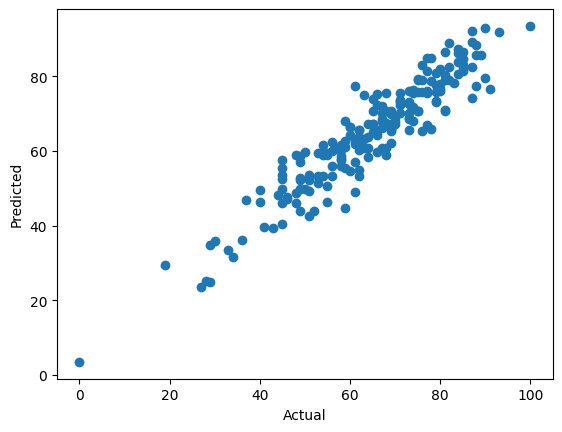

In [17]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

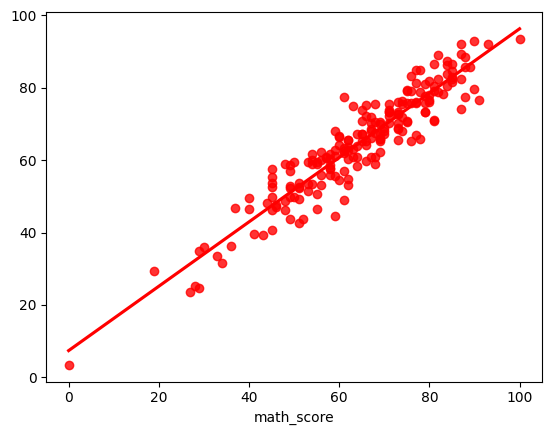

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

Different between actual and predicted values

In [19]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.6875,14.3125
737,53,59.3750,-6.3750
740,80,76.5625,3.4375
660,74,76.2500,-2.2500
411,84,87.5000,-3.5000
...,...,...,...
408,52,43.8750,8.1250
332,62,62.6875,-0.6875
208,74,68.0000,6.0000
613,65,67.3125,-2.3125
